Аналитика в авиакомпании

Описание данных

База данных об авиаперевозках:
    
Таблица airports — информация об аэропортах:
    
airport_code — трёхбуквенный код аэропорта

airport_name — название аэропорта

city — город

timezone — временная зона

Таблица aircrafts — информация об самолётах:
    
aircraft_code — код модели самолёта

model — модель самолёта

range — количество самолётов

Таблица tickets — информация о билетах:
    
ticket_no — уникальный номер билета

passenger_id — персональный идентификатор пассажира

passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
    
flight_id — уникальный идентификатор рейса

departure_airport — аэропорт вылета

departure_time — дата и время вылета

arrival_airport — аэропорт прилёта

arrival_time — дата и время прилёта

aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

ticket_no — номер билета

flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях

festival_id — уникальный номер фестиваля

festival_date — дата проведения фестиваля

festival_city — город проведения фестиваля

festival_name — название фестиваля


/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:

model — модели самолета

flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года


/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:

city — городах

average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:

импортировать файлы;

изучить данные в них;

проверить типы данных на корректность;

выбрать топ-10 городов по количеству рейсов;

построить графики: 

модели самолетов и количество рейсов, 

города и количество рейсов, 

топ-10 городов и количество рейсов;

сделать выводы по каждому из графиков, пояснить результат.

In [1]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# ТОП 10 моделей самолетов
models_and_flights_amount = pd.read_csv('/datasets/query_1.csv')
models_and_flights_amount.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
models_and_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [5]:
city_and_average_flights = pd.read_csv('/datasets/query_3.csv')
city_and_average_flights.tail(10)

,city,average_flights
91,Хабаровск,6.55
92,Ханты-Мансийск,8.42
93,Чебоксары,5.00
94,Челябинск,6.71
95,Череповец,2.16
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74
100,Ярославль,1.32


In [6]:
city_and_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
city_and_average_flights_plot = city_and_average_flights.sort_values(by='average_flights', ascending=False).head(10)
city_and_average_flights_plot

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [8]:
model_and_flights_amount_plot = models_and_flights_amount.sort_values(by='flights_amount', ascending=False).head(10)
model_and_flights_amount_plot

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


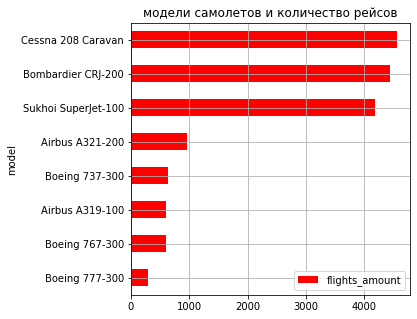

In [9]:
#Строим график по модели самолетов и количество рейсов
model_and_flights_amount_plot.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='модели самолетов и количество рейсов', color='r')
    

Спасибо за замечание, но если это возможно хотел бы оставить график так как есть)

Вывод

Лидируют с большим отрывом 3 модели: Сессна 208, Бомбардье 200 и Сухой 100. Неожиданный факт, что на первом месте Сессна, которая используется на авиалиниях малой протяженности.

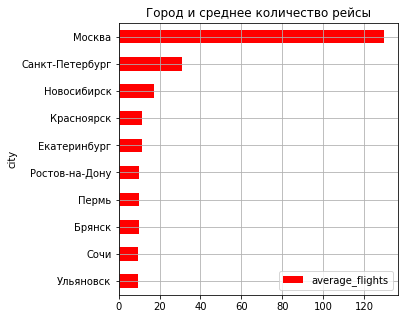

In [10]:
#Строим график по городам и количество рейсов
city_and_average_flights_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Город и среднее количество рейсы', color='r')

Вывод

Ожидаемо, что Москва впереди — это транспортный пул в любое время года. Питер и Новосибирск занимают 2 и 3 место. Остальные города отличаются слабо.

Общий вывод

Исходя из анализа данных можно сказать, что спрос во время фестиваля на авиабилеты практически не меняется. Из тога что явно удивило так это Сессна, которая используется на авиалиниях малой протяженности